In [4]:
import csv
#importing spin data and removing heading
f = open("/Users/thekid/Documents/1mil-RNG-DoubleZero.txt", "r")
pre_spins = list(csv.reader(f))
tspins = pre_spins[3:]

In [5]:
#making sure that all objects in our list of spins are actual spins and not blanks
spins = []
tspins = list(filter(None, tspins))
for row in tspins:
    for item in row:
        try:
            spins.append(int(item))
        except Exception:
            continue



In [3]:
# a cool million revolutions of the roulette wheel
len(spins)

1000000

In [6]:
#creating a function that will take a starting pile of cash, a fixed number of bets, and our data as inputs
def gambler(bankroll,bets,data):
    results = []
    #we are going to run our roulette system through the entire one million spins we have in data
    #defining a set number of bets to be played in essentially one million 'rounds' beforehand
    #some of the final 'rounds' will be shorter than the set number of bets because there will not be enough
    #spins in the dataset to accomodate them. that's okay. we think of that as the casino's closing time. it happens.
    for idx, item in enumerate(data):
        bank = bankroll
        start_idx = idx
        number_of_bets = bets
        end_idx = start_idx + number_of_bets
        #our starting bet, default plug is one
        current_bet = 1
        for spin in spins[start_idx:end_idx]:
            #most casinos have a max bet of $10k at roulette tables. we implement that here.
            if current_bet > 10000:
                current_bet = 10000
            if (idx - 1) % number_of_bets == 0:
                bank = bankroll
            #we are betting on odd in our model, so an even spin nets a loss of current bet
            #after each loss, the current bet is tripled, in line with the strategy
            if spin % 2 == 0:
                bank = bank - current_bet
                current_bet = current_bet*3
            #when we win, we win double our current bet and the current bet resets to 1
            else:
                bank = bank + current_bet*2
                current_bet = 1
            #if we run out of money, we lose. this gets recorded in our results
            if bank <= 0:
                results.append(str("lost"))
                bank = bankroll
                break
        #if after completing the fixed number of bets, we have netted a win or a loss, this is appended to our results
        if bank != bankroll:
            results.append(bank)
    return results


In [9]:
from numpy import median

#lets do some analysis on our list of one million betting outcomes. this function is going to take the results of our 'gambler' function and a starting pool of money
def analysis(a,start_money):
    results_breakdown = {}
    lost_count = 0
    down_count = 0
    up_count = 0
    up_count_list = []
    highest_win = None
    total_winnings = 0
    #this is going to count total losses where we've lost everything, losses where we're simply 'down', and wins where we are 'up'
    for each in a:
        if each == "lost":
            lost_count += 1
        if type(each) != str and each < start_money:
            down_count += 1
        if type(each) != str and each > start_money:
            up_count += 1
            up_count_list.append(each)
    #stats to get a sense of our results and the net value of a single implementation of our system        
    median_winnings = median(up_count_list)
    max_winnings = max(up_count_list)
    win_rate = up_count/(down_count+lost_count+up_count)
    total_loss_rate = lost_count/(down_count+lost_count+up_count)
    average_winnings = sum(up_count_list)/up_count
    net_value = average_winnings*win_rate
    
    results_breakdown["lost"] = lost_count
    results_breakdown["down"] = down_count
    results_breakdown["up"] = up_count
    results_breakdown["median_winnings"] = median_winnings
    results_breakdown["average_winnings"] = average_winnings
    results_breakdown["max_winnings"] = max_winnings
    results_breakdown["win_rate"] = win_rate
    results_breakdown["lose_everything_rate"] = total_loss_rate
    results_breakdown["net_value"] = net_value
    
    return results_breakdown

In [10]:
results = gambler(1000,100,spins)
analysis(results,1000)

{'lost': 265116,
 'down': 5571,
 'up': 729310,
 'median_winnings': 2546.0,
 'average_winnings': 3140.3230135333397,
 'max_winnings': 34758,
 'win_rate': 0.7293121879365638,
 'lose_everything_rate': 0.26511679535038607,
 'net_value': 2290.2758478275437}

In [11]:
best_net_value = 0
optimal_bets = 0
result_print = []
for i in range(1,100):
    bets = i
    results = gambler(1000,bets,spins)
    glee = analysis(results,1000)
    net_value = glee['net_value']
    lost_ev = glee['lose_everything_rate']
    max_win = glee['max_winnings']
    if net_value > best_net_value:
        best_net_value = net_value
        optimal_bets = bets
    to_append = [bets,net_value,lost_ev,max_win]
    result_print.append(to_append)
        
key = [optimal_bets,best_net_value]

In [19]:
key

[99, 2276.489520979042]

In [22]:
import pandas as pd
s = pd.DataFrame(result_print)

In [24]:
s.columns = ['bets','net_value','lost_ev','max_win']

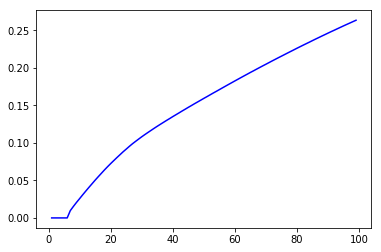

In [41]:
import matplotlib.pyplot as plt
# For prettier plots.
import seaborn

plt.plot(s['bets'], s['lost_ev'],color='b')
#plt.plot(s['bets'], s['net_value'],color='g')
#plt.plot(s['bets'], s['max_win'],color='y')
plt.show()